In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dice_df = pd.DataFrame({"sides": [i for i in range(1, 7)]})
dice_df

,sides
0,1
1,2
2,3
3,4
4,5
5,6


In [35]:
dice_rolls = dice_df.sample(n=1000000, replace=True).reset_index(drop=True)
dice_rolls.head()

,sides
0,1
1,1
2,6
3,6
4,4


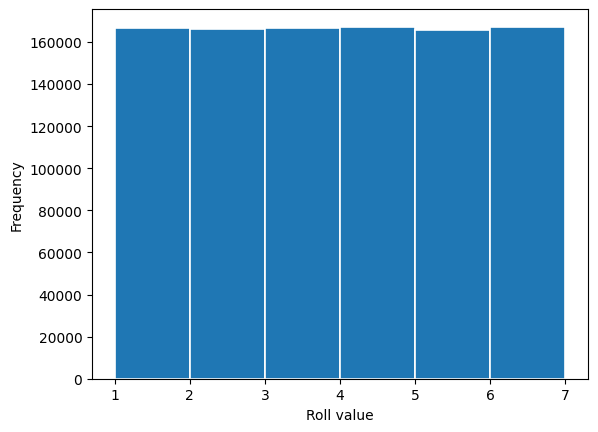

In [37]:
fig, ax = plt.subplots()

ax.hist(x=dice_rolls, bins=[1,2,3,4,5,6,7], edgecolor='white', linewidth=1.2)
ax.set_xlabel("Roll value")
ax.set_ylabel("Frequency")

plt.show()

In [41]:
expected_value = (dice_df * (1/6)).sum()
expected_value

sides    3.5
dtype: float64

In [54]:
# take a random sample of min 30 rolls
sample_rolls = dice_df.sample(n=30, replace=True).reset_index(drop=True)
sample_rolls.head()

,sides
0,5
1,2
2,1
3,5
4,2


In [55]:
# take mean of sample rolls
sample_mean = sample_rolls.mean().iloc[0]
sample_mean

np.float64(3.6333333333333333)

In [56]:
# get 95% confidence interval using CLT
sample_std = sample_rolls.std().iloc[0]
standard_error = sample_std / np.sqrt(30)
ci_min = sample_mean - 2 * standard_error
ci_max = sample_mean + 2 * standard_error
ci = [ci_min, ci_max]
ci

[np.float64(2.9656329852809513), np.float64(4.301033681385715)]

In [50]:
# above indicates that 95% of the time, the sample mean will fall within this range
# 95% of the time, a sample of rolls will have a mean of at least 2.97 and at most 4.3

In [59]:
sample_means = []

for _ in range(10000):
    sample_rolls = dice_df.sample(n=30, replace=True).reset_index(drop=True)
    sample_mean = sample_rolls.mean().iloc[0]
    sample_means.append(sample_mean)

inside_ci = 0

for sample_mean in sample_means:
    if sample_mean >= ci[0] and sample_mean <= ci[1]:
        inside_ci += 1

inside_ci / len(sample_means)

0.9584